In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load

In [2]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.drop(['No', 'X1 transaction date', 'X5 latitude', 'X6 longitude'], axis=1, inplace=True)

In [4]:
new_col_names = {
    'X2 house age' : 'house_age',
    'X3 distance to the nearest MRT station' : 'dist_to_MRT',
    'X4 number of convenience stores' : 'conv_stores',
    'Y house price of unit area' : 'price_unit_area'
}
df.rename(columns=new_col_names, inplace=True)
df.head()

,house_age,dist_to_MRT,conv_stores,price_unit_area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [5]:
X = df.drop('price_unit_area', axis=1)
y = df['price_unit_area']

In [6]:
X.shape

(414, 3)

In [7]:
y.shape

(414,)

In [8]:
degree_2_polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
degree_3_polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
degree_4_polynomial_converter = PolynomialFeatures(degree=4, include_bias=False)

In [9]:
deg_2_poly_feat = degree_2_polynomial_converter.fit_transform(X=X)
deg_3_poly_feat = degree_3_polynomial_converter.fit_transform(X=X)
deg_4_poly_feat = degree_4_polynomial_converter.fit_transform(X=X)

In [10]:
print(f"X_shape:        {X.shape}\n"
      f"Poly_2_shape:       \n{deg_2_poly_feat[0]}\n\n"
      f"Poly_3_shape:       \n{deg_3_poly_feat[0]}\n\n"
      f"Poly_4_shape:       \n{deg_4_poly_feat[0]}\n")

X_shape:        (414, 3)
Poly_2_shape:       
[  32.           84.87882      10.         1024.         2716.12224
  320.         7204.41408459  848.7882      100.        ]

Poly_3_shape:       
[3.20000000e+01 8.48788200e+01 1.00000000e+01 1.02400000e+03
 2.71612224e+03 3.20000000e+02 7.20441408e+03 8.48788200e+02
 1.00000000e+02 3.27680000e+04 8.69159117e+04 1.02400000e+04
 2.30541251e+05 2.71612224e+04 3.20000000e+03 6.11502166e+05
 7.20441408e+04 8.48788200e+03 1.00000000e+03]

Poly_4_shape:       
[3.20000000e+01 8.48788200e+01 1.00000000e+01 1.02400000e+03
 2.71612224e+03 3.20000000e+02 7.20441408e+03 8.48788200e+02
 1.00000000e+02 3.27680000e+04 8.69159117e+04 1.02400000e+04
 2.30541251e+05 2.71612224e+04 3.20000000e+03 6.11502166e+05
 7.20441408e+04 8.48788200e+03 1.00000000e+03 1.04857600e+06
 2.78130917e+06 3.27680000e+05 7.37732002e+06 8.69159117e+05
 1.02400000e+05 1.95680693e+07 2.30541251e+06 2.71612224e+05
 3.20000000e+04 5.19035823e+07 6.11502166e+06 7.20441408e+05
 8.48

In [11]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(deg_2_poly_feat, y, test_size=0.3, random_state=101)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(deg_3_poly_feat, y, test_size=0.3, random_state=101)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(deg_4_poly_feat, y, test_size=0.3, random_state=101)

In [12]:
model_2 = LinearRegression(fit_intercept=True)
model_3 = LinearRegression(fit_intercept=True)
model_4 = LinearRegression(fit_intercept=True)

In [13]:
model_2.fit(X_train_2, y_train_2)
model_3.fit(X_train_3, y_train_3)
model_4.fit(X_train_4, y_train_4)

LinearRegression()

In [14]:
model_2.coef_

array([-1.21595259e+00, -9.83951154e-03,  1.65284336e+00,  1.96238425e-02,
        6.99735337e-05,  2.41256713e-02,  9.14423671e-07, -9.42905100e-04,
       -8.55580143e-02])

In [15]:
model_3.coef_

array([-5.99029535e-01, -1.66657697e-02,  5.51472728e+00, -1.07938111e-02,
       -7.24757207e-05, -5.21921845e-02,  4.51297668e-06, -2.33471671e-03,
       -1.07043322e+00,  4.81044045e-04, -2.84657636e-07,  6.56574769e-04,
        1.82822946e-08,  6.43511967e-05,  3.14764156e-03, -4.37521692e-10,
        7.70601823e-08,  1.43586566e-04,  6.37778646e-02])

In [16]:
model_4.coef_

array([-5.13068457e-01, -3.15978378e-02, -8.49128339e+00, -6.13930089e-02,
       -4.75740858e-04, -7.20139658e-02,  1.99990473e-05,  1.99380196e-02,
        3.23972771e+00,  2.03220537e-03,  3.29030720e-05, -2.77333333e-03,
       -2.17356536e-07,  1.30325382e-03, -7.21304383e-03, -2.42296846e-09,
       -2.02083076e-05, -4.64643972e-03, -3.82503312e-01,  9.50383613e-06,
       -1.87475631e-06, -1.87256667e-04,  2.19250881e-08, -2.21185320e-06,
        1.11896177e-03, -5.26149247e-11, -3.59948318e-07, -8.77066363e-05,
        6.85415827e-05, -6.18186058e-14,  4.01543256e-09,  2.08098350e-06,
        2.50496015e-04,  1.51338391e-02])

In [17]:
y_pred_2 = model_2.predict(X_test_2)
y_pred_3 = model_3.predict(X_test_3)
y_pred_4 = model_4.predict(X_test_4)

In [18]:
MAE_2 = mean_absolute_error(y_test_2,y_pred_2)
MAE_3 = mean_absolute_error(y_test_3,y_pred_3)
MAE_4 = mean_absolute_error(y_test_4,y_pred_4)
print(f"Mean Absolute error for this model is \n{MAE_2}\n{MAE_3}\n{MAE_4}\n")

MSE_2 = mean_squared_error(y_test_2,y_pred_2)
MSE_3 = mean_squared_error(y_test_3,y_pred_3)
MSE_4 = mean_squared_error(y_test_4,y_pred_4)
print(f"Mean Squared Error for this model is \n{MSE_2}\n{MSE_3}\n{MSE_4}\n")

RMSE_2 = np.sqrt(MSE_2) # RMSE = MSE**0.5 or RMSE = sqrt(MSE)
RMSE_3 = np.sqrt(MSE_3)
RMSE_4 = np.sqrt(MSE_4)
print(f"Root Mean Squared Error for this model is \n{RMSE_2}\n{RMSE_3}\n{RMSE_4}\n")

tolerance_2 = RMSE_2 / y.mean()
tolerance_3 = RMSE_3 / y.mean()
tolerance_4 = RMSE_4 / y.mean()
print(f"Tolerance for this model based on prediction value = \n{tolerance_2}\n{tolerance_3}\n{tolerance_4}\n")

model_score_2 = r2_score(y_test_2,y_pred_2)
model_score_3 = r2_score(y_test_3,y_pred_3)
model_score_4 = r2_score(y_test_4,y_pred_4)

print(f"R2_score for our model is \n{model_score_2}\n{model_score_3}\n{model_score_4}\n")

Mean Absolute error for this model is 
5.045877401674329
4.740072847566684
5.7627126746564015

Mean Squared Error for this model is 
42.85807863874669
40.74137328657951
59.7129881107733

Root Mean Squared Error for this model is 
6.546608178190191
6.382896935293528
7.727417945910089

Tolerance for this model based on prediction value = 
0.17236900658687715
0.16805856925244028
0.2034591529787187

R2_score for our model is 
0.6762405853102516
0.6922306461728667
0.5489148675311399



In [19]:
# Step #8: Bais-Variation trade-off

train_rmse_errors = []
test_rmse_errors = []

for d in range(1,11):
    # Create poly-convertor
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)

    # Create our poly_X
    poly_features = polynomial_converter.fit_transform(X)

    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(poly_features, 
                                                        y, 
                                                        test_size=0.3, 
                                                        random_state=101)
    
    # Train our model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # Calculate and collect RMSE
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = mean_squared_error(y_train,train_pred)**0.5
    test_RMSE = mean_squared_error(y_test,test_pred)**0.5

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)


In [29]:
train_rmse_errors

[9.93993548113584,
 9.085686276660011,
 8.935715748147032,
 9.144678120569797,
 8.916672039456982,
 40.59858114999911,
 12.917216258114612,
 83.47364100514694,
 20.686841129774617,
 11.136167145113909]

In [30]:
test_rmse_errors

[7.312701524257379,
 6.546608178190191,
 6.382896935293528,
 7.727417945910089,
 10.78273403496066,
 288.47654138096635,
 267.40536972503793,
 537.2178647199977,
 1240.0997368498017,
 336.08837572753873]

In [33]:
results_list = []

for res_1, res_2 in zip(train_rmse_errors, test_rmse_errors):
    diff = res_1 - res_2
    results_list.append(diff)

results_list

[2.6272339568784613,
 2.5390780984698207,
 2.5528188128535048,
 1.4172601746597078,
 -1.866061995503678,
 -247.87796023096723,
 -254.4881534669233,
 -453.74422371485076,
 -1219.412895720027,
 -324.9522085824248]

In [34]:
results_list = []

for res_1, res_2 in zip(train_rmse_errors, test_rmse_errors):
    diff = res_2 - res_1
    results_list.append(diff)

results_list

[-2.6272339568784613,
 -2.5390780984698207,
 -2.5528188128535048,
 -1.4172601746597078,
 1.866061995503678,
 247.87796023096723,
 254.4881534669233,
 453.74422371485076,
 1219.412895720027,
 324.9522085824248]

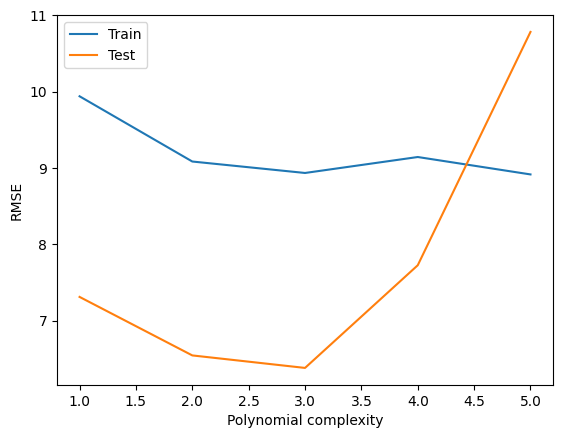

In [31]:
plt.plot(range(1,6), train_rmse_errors[:5],label='Train')
plt.plot(range(1,6), test_rmse_errors[:5],label='Test')
plt.xlabel('Polynomial complexity')
plt.ylabel('RMSE')
plt.legend()

In [20]:
final_poly_convertor = PolynomialFeatures(degree=2,include_bias=False)
final_model = LinearRegression()
poly_X = final_poly_convertor.fit_transform(X)
final_model.fit(poly_X,y)

LinearRegression()

In [21]:
final_model.coef_

array([-1.05181517e+00, -9.66282886e-03,  1.91730944e+00,  1.66627724e-02,
        8.50471076e-05,  1.56349570e-02,  8.17994214e-07, -1.04811044e-03,
       -9.95225214e-02])

In [22]:
model_3.coef_

array([-5.99029535e-01, -1.66657697e-02,  5.51472728e+00, -1.07938111e-02,
       -7.24757207e-05, -5.21921845e-02,  4.51297668e-06, -2.33471671e-03,
       -1.07043322e+00,  4.81044045e-04, -2.84657636e-07,  6.56574769e-04,
        1.82822946e-08,  6.43511967e-05,  3.14764156e-03, -4.37521692e-10,
        7.70601823e-08,  1.43586566e-04,  6.37778646e-02])

In [23]:
from joblib import dump
dump(final_model,"poly_final_boss_model_2024_01_18.joblib")

['poly_final_boss_model_2024_01_18.joblib']

In [24]:
dump(final_poly_convertor,"poly_boss_convertor_2024_01_18.joblib")

['poly_boss_convertor_2024_01_18.joblib']

In [25]:
my_loaded_model = load("poly_final_boss_model_2024_01_18.joblib")
my_loaded_convertor = load("poly_boss_convertor_2024_01_18.joblib")

In [26]:
house_campaign = [[32, 84.87882, 10]]
campaign_poly = my_loaded_convertor.transform(house_campaign)
campaign_poly
result = my_loaded_model.predict(campaign_poly)

c:\Users\ericb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [27]:
result

array([47.75880992])

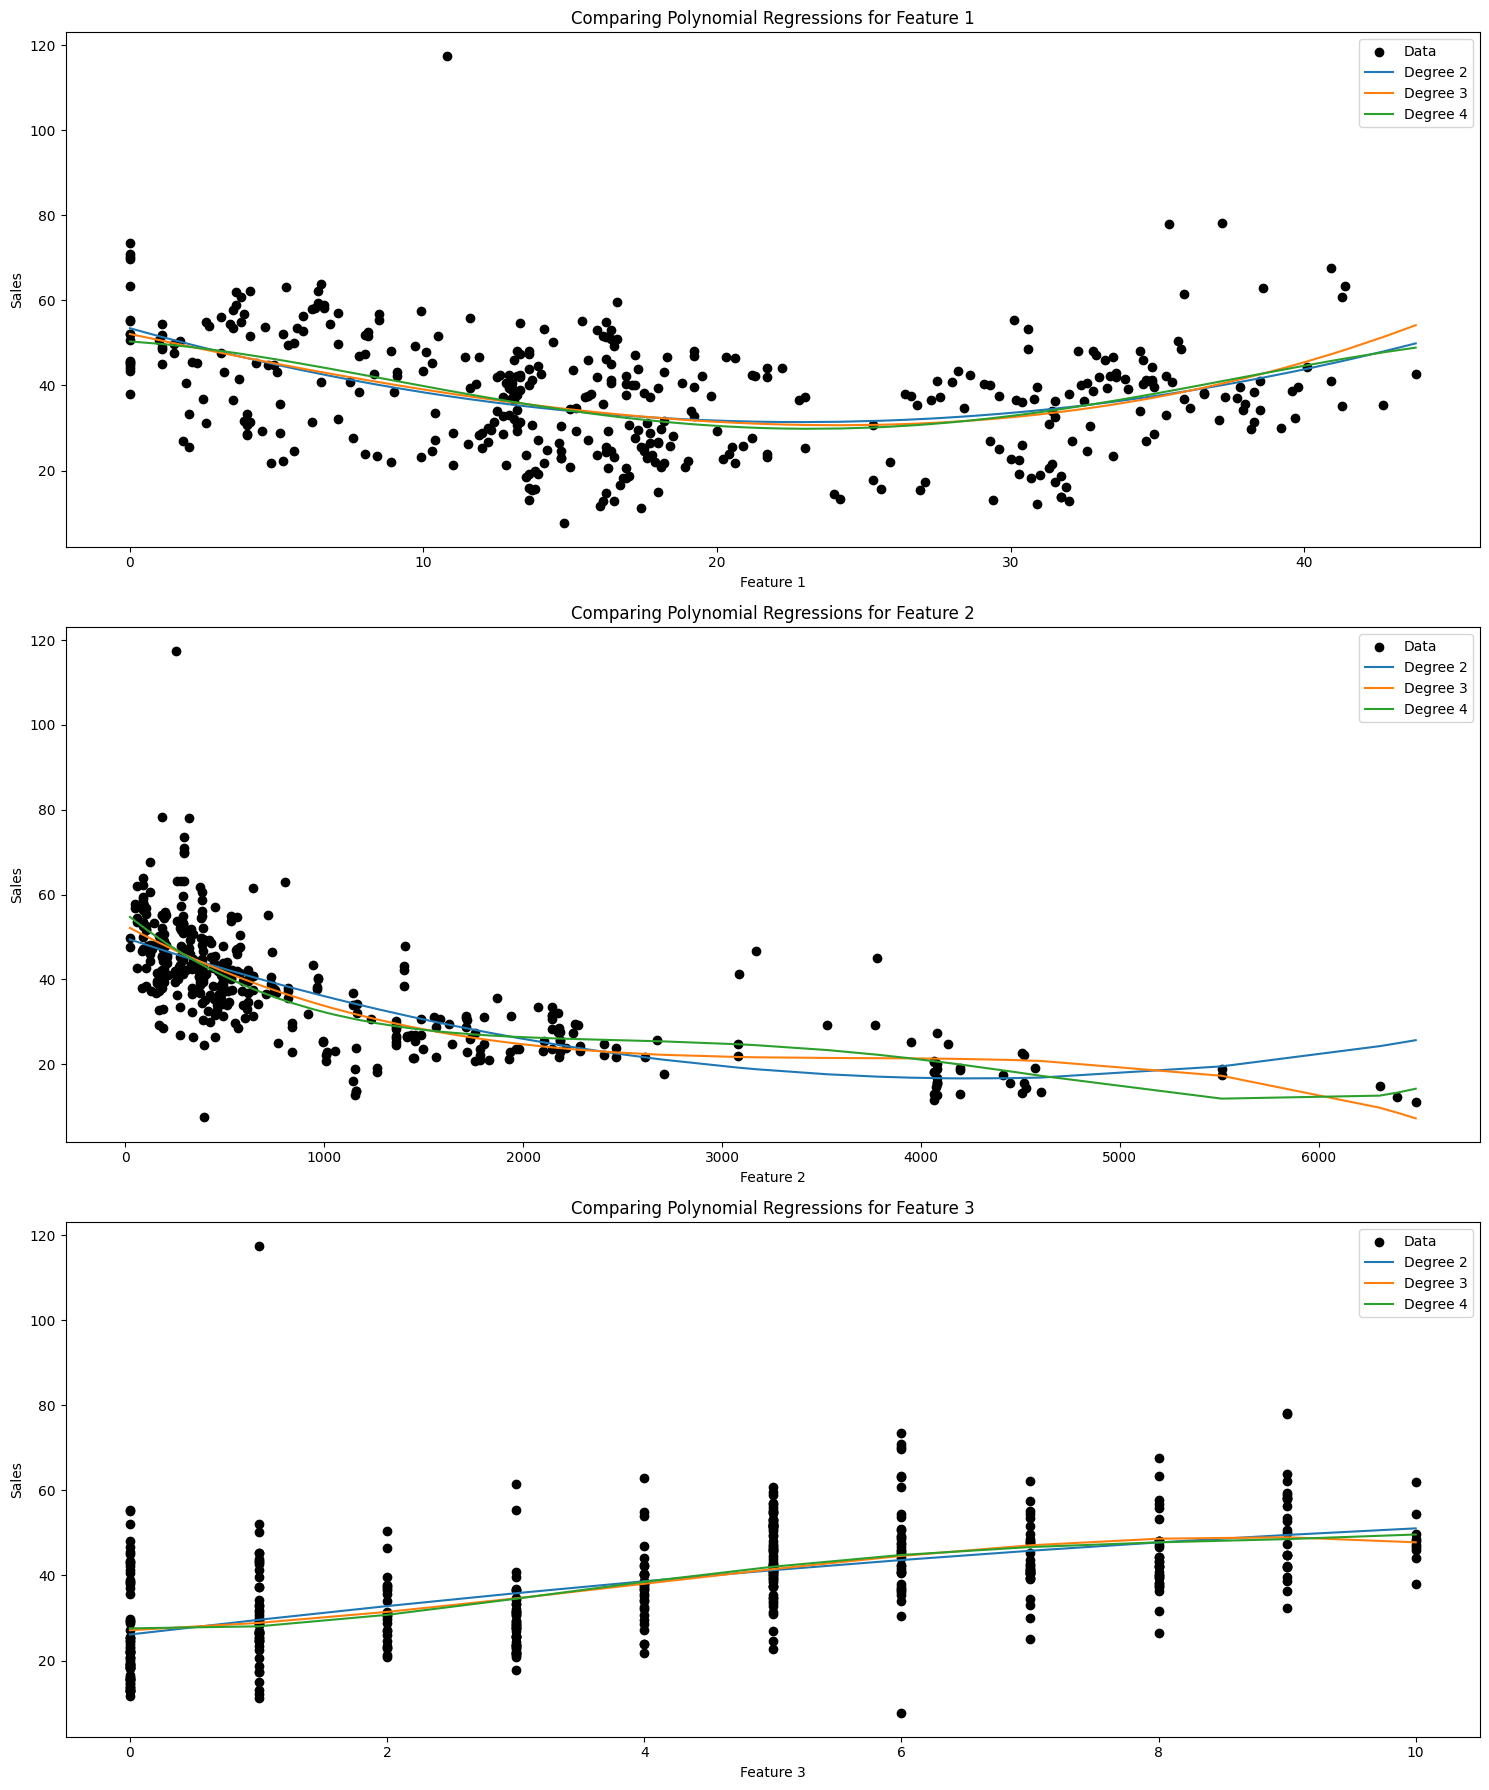

In [28]:
X_features = df[['house_age', 'dist_to_MRT', 'conv_stores']].values
y = df['price_unit_area'].values.reshape(-1, 1)

degrees = [2, 3, 4]
num_features = X_features.shape[1]

plt.figure(figsize=(15, 6 * num_features))

for i in range(num_features):
    X_feature = X_features[:, i].reshape(-1, 1)

    plt.subplot(num_features, 1, i + 1)
    plt.scatter(X_feature, y, color='black', label='Data')

    for degree in degrees:
        polynomial_converter = PolynomialFeatures(degree=degree, include_bias=False)
        X_feature_poly = polynomial_converter.fit_transform(X_feature)

        model = LinearRegression()
        model.fit(X_feature_poly, y)
        y_poly_pred = model.predict(X_feature_poly)

        sorted_zip = sorted(zip(X_feature, y_poly_pred))
        X_feature_sorted, y_poly_pred_sorted = zip(*sorted_zip)

        plt.plot(X_feature_sorted, y_poly_pred_sorted, label=f'Degree {degree}')

    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Sales')
    plt.title(f'Comparing Polynomial Regressions for Feature {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()